## Imports and Dataframe Setup

In [1]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
from scipy import stats
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from scipy.stats import kurtosis
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve


### Loading specific dataset for model. This notebook reflects several datasets used for modeling that can easily be changed by adding and removing docstrings

In [2]:
#Unrefined violent crime, includes some violent crimes that don't have a strong correlation with safety and trust

"""
#CREATING DF FOR VIOLENT CRIME 

import pandas as pd
from sqlalchemy import create_engine

# Database credentials
username = 'crimeadmin'
password = '4DAnuuSBWVQ92w!F'
host = 'crimedbmysql.cspoouh9lugd.us-east-2.rds.amazonaws.com'
database = 'crimedb_mysql'
port = '3306'  # default MySQL port

# Create the database engine
engine = create_engine(f'mysql+mysqlconnector://{username}:{password}@{host}:{port}/{database}')

# SQL query or table name
query = "SELECT * FROM ML_VIOLENTCRIME_EDU_INCOME"  #Name of table 

# Create a DataFrame from the SQL query
df_violent = pd.read_sql(query, engine)
"""


'\n#CREATING DF FOR VIOLENT CRIME \n\nimport pandas as pd\nfrom sqlalchemy import create_engine\n\n# Database credentials\nusername = \'crimeadmin\'\npassword = \'4DAnuuSBWVQ92w!F\'\nhost = \'crimedbmysql.cspoouh9lugd.us-east-2.rds.amazonaws.com\'\ndatabase = \'crimedb_mysql\'\nport = \'3306\'  # default MySQL port\n\n# Create the database engine\nengine = create_engine(f\'mysql+mysqlconnector://{username}:{password}@{host}:{port}/{database}\')\n\n# SQL query or table name\nquery = "SELECT * FROM ML_VIOLENTCRIME_EDU_INCOME"  #Name of table \n\n# Create a DataFrame from the SQL query\ndf_violent = pd.read_sql(query, engine)\n'

In [3]:

#REFINED DATAFRAME OF VIOLENT CRIME. ONLY INCLUDES ASSAULT, BATTERY, AND HOMICIDE
"""
import pandas as pd
from sqlalchemy import create_engine

# Database credentials
username = 'crimeadmin'
password = '4DAnuuSBWVQ92w!F'
host = 'crimedbmysql.cspoouh9lugd.us-east-2.rds.amazonaws.com'
database = 'crimedb_mysql'
port = '3306'  # default MySQL port

# Create the database engine
engine = create_engine(f'mysql+mysqlconnector://{username}:{password}@{host}:{port}/{database}')

# SQL query or table name
query = "SELECT * FROM ML_VIOLENT_REVISED"  #Name of table 

# Create a DataFrame from the SQL query
df_violent = pd.read_sql(query, engine)
"""


'\nimport pandas as pd\nfrom sqlalchemy import create_engine\n\n# Database credentials\nusername = \'crimeadmin\'\npassword = \'4DAnuuSBWVQ92w!F\'\nhost = \'crimedbmysql.cspoouh9lugd.us-east-2.rds.amazonaws.com\'\ndatabase = \'crimedb_mysql\'\nport = \'3306\'  # default MySQL port\n\n# Create the database engine\nengine = create_engine(f\'mysql+mysqlconnector://{username}:{password}@{host}:{port}/{database}\')\n\n# SQL query or table name\nquery = "SELECT * FROM ML_VIOLENT_REVISED"  #Name of table \n\n# Create a DataFrame from the SQL query\ndf_violent = pd.read_sql(query, engine)\n'

In [4]:
#REFINED DATASET FOR MODEL. CONTAINS CRIMES PER CAPITA, SECTOR POPULATION DENSITY AND POPULATION TOTAL

"""
import pandas as pd
from sqlalchemy import create_engine

# Database credentials
username = 'crimeadmin'
password = '4DAnuuSBWVQ92w!F'
host = 'crimedbmysql.cspoouh9lugd.us-east-2.rds.amazonaws.com'
database = 'crimedb_mysql'
port = '3306'  # default MySQL port

# Create the database engine
engine = create_engine(f'mysql+mysqlconnector://{username}:{password}@{host}:{port}/{database}')

# SQL query or table name
query = "SELECT * FROM TIME_SERIES_REGRESSION_2"  #Name of table 

# Create a DataFrame from the SQL query
df_violent = pd.read_sql(query, engine)
"""


'\nimport pandas as pd\nfrom sqlalchemy import create_engine\n\n# Database credentials\nusername = \'crimeadmin\'\npassword = \'4DAnuuSBWVQ92w!F\'\nhost = \'crimedbmysql.cspoouh9lugd.us-east-2.rds.amazonaws.com\'\ndatabase = \'crimedb_mysql\'\nport = \'3306\'  # default MySQL port\n\n# Create the database engine\nengine = create_engine(f\'mysql+mysqlconnector://{username}:{password}@{host}:{port}/{database}\')\n\n# SQL query or table name\nquery = "SELECT * FROM TIME_SERIES_REGRESSION_2"  #Name of table \n\n# Create a DataFrame from the SQL query\ndf_violent = pd.read_sql(query, engine)\n'

In [5]:
#DATASET CONTAINING ALL DEMOGRAPHIC FEATURES OF POLICE SENTIMENT SCORES. MADE MODEL PERFORM WORSE D/T POOR ASSOCIATION WITH ADDED FEATURES AND CRIME

"""
import pandas as pd
from sqlalchemy import create_engine

# Database credentials
username = 'crimeadmin'
password = '4DAnuuSBWVQ92w!F'
host = 'crimedbmysql.cspoouh9lugd.us-east-2.rds.amazonaws.com'
database = 'crimedb_mysql'
port = '3306'  # default MySQL port

# Create the database engine
engine = create_engine(f'mysql+mysqlconnector://{username}:{password}@{host}:{port}/{database}')

# SQL query or table name
query = "SELECT * FROM TIME_SERIES_REGRESSION_4"  #Name of table 

# Create a DataFrame from the SQL query
df_violent = pd.read_sql(query, engine)

#If using Dataset with all demographic data


columns_to_keep = [
    'Month',
    'Sector',
    'Violent Crimes',
   	
    'Population Density (people/sqkm)',
    'Units per SqKm',	
    'Units per Capita',
    
    'SAFETY',
    'TRUST',


    'S_EDUCATION_LOW', 'S_EDUCATION_MEDIUM', 'S_EDUCATION_HIGH',
    'S_INCOME_LOW', 'S_INCOME_MEDIUM', 'S_INCOME_HIGH',

    'T_EDUCATION_LOW', 'T_EDUCATION_MEDIUM', 'T_EDUCATION_HIGH',
    'T_INCOME_LOW', 'T_INCOME_MEDIUM', 'T_INCOME_HIGH',

    'T_RESPECT_RACE_AFRICAN_AMERICAN',
    'T_RACE_AFRICAN_AMERICAN',
    'T_RESPECT_AGE_HIGH',

    
    'T_LISTEN_RACE_AFRICAN_AMERICAN',
    'T_RESPECT_EDUCATION_LOW',
    'S_RACE_AFRICAN_AMERICAN',

    'T_LISTEN',
    'T_RESPECT',
 
    
]


# Create a new DataFrame with only the selected columns
df_violent = df_violent[columns_to_keep]

"""

'\nimport pandas as pd\nfrom sqlalchemy import create_engine\n\n# Database credentials\nusername = \'crimeadmin\'\npassword = \'4DAnuuSBWVQ92w!F\'\nhost = \'crimedbmysql.cspoouh9lugd.us-east-2.rds.amazonaws.com\'\ndatabase = \'crimedb_mysql\'\nport = \'3306\'  # default MySQL port\n\n# Create the database engine\nengine = create_engine(f\'mysql+mysqlconnector://{username}:{password}@{host}:{port}/{database}\')\n\n# SQL query or table name\nquery = "SELECT * FROM TIME_SERIES_REGRESSION_4"  #Name of table \n\n# Create a DataFrame from the SQL query\ndf_violent = pd.read_sql(query, engine)\n\n#If using Dataset with all demographic data\n\n\ncolumns_to_keep = [\n    \'Month\',\n    \'Sector\',\n    \'Violent Crimes\',\n   \t\n    \'Population Density (people/sqkm)\',\n    \'Units per SqKm\',\t\n    \'Units per Capita\',\n    \n    \'SAFETY\',\n    \'TRUST\',\n\n\n    \'S_EDUCATION_LOW\', \'S_EDUCATION_MEDIUM\', \'S_EDUCATION_HIGH\',\n    \'S_INCOME_LOW\', \'S_INCOME_MEDIUM\', \'S_INCOME_HI

In [6]:
#LATEST DATASET FOR MODEL. CONTAINS NUMBER OF HOUSING UNITS DEVELOPED FOR EACH SECTOR

"""
import pandas as pd
from sqlalchemy import create_engine

# Database credentials
username = 'crimeadmin'
password = '4DAnuuSBWVQ92w!F'
host = 'crimedbmysql.cspoouh9lugd.us-east-2.rds.amazonaws.com'
database = 'crimedb_mysql'
port = '3306'  # default MySQL port

# Create the database engine
engine = create_engine(f'mysql+mysqlconnector://{username}:{password}@{host}:{port}/{database}')

# SQL query or table name
query = "SELECT * FROM TIME_SERIES_REGRESSION_3"  #Name of table 

# Create a DataFrame from the SQL query
df_violent = pd.read_sql(query, engine)



#DATAFRAME CLEANING

#If NOT USING TOTAL CRIME (Better for model as of now)

#Drop the current 'Violent Crimes' column
df_violent = df_violent.drop(columns=['Violent Crimes per Capita'])


#Optionally drop Population total (should drop population total if using population density)
df_violent = df_violent.drop(columns=['TOTAL POPULATION'])

#Drop Number of Units (not standardized)
df_violent = df_violent.drop(columns=['Units'])
#Drop Units per SqKm (weak correlation)
#df_violent = df_violent.drop(columns=['Units per SqKm'])
"""


'\nimport pandas as pd\nfrom sqlalchemy import create_engine\n\n# Database credentials\nusername = \'crimeadmin\'\npassword = \'4DAnuuSBWVQ92w!F\'\nhost = \'crimedbmysql.cspoouh9lugd.us-east-2.rds.amazonaws.com\'\ndatabase = \'crimedb_mysql\'\nport = \'3306\'  # default MySQL port\n\n# Create the database engine\nengine = create_engine(f\'mysql+mysqlconnector://{username}:{password}@{host}:{port}/{database}\')\n\n# SQL query or table name\nquery = "SELECT * FROM TIME_SERIES_REGRESSION_3"  #Name of table \n\n# Create a DataFrame from the SQL query\ndf_violent = pd.read_sql(query, engine)\n\n\n\n#DATAFRAME CLEANING\n\n#If NOT USING TOTAL CRIME (Better for model as of now)\n\n#Drop the current \'Violent Crimes\' column\ndf_violent = df_violent.drop(columns=[\'Violent Crimes per Capita\'])\n\n\n#Optionally drop Population total (should drop population total if using population density)\ndf_violent = df_violent.drop(columns=[\'TOTAL POPULATION\'])\n\n#Drop Number of Units (not standardized)

In [7]:
import pandas as pd
from sqlalchemy import create_engine

# Database credentials
username = 'crimeadmin'
password = '4DAnuuSBWVQ92w!F'
host = 'crimedbmysql.cspoouh9lugd.us-east-2.rds.amazonaws.com'
database = 'crimedb_mysql'
port = '3306'  # default MySQL port

# Create the database engine
engine = create_engine(f'mysql+mysqlconnector://{username}:{password}@{host}:{port}/{database}')

# SQL query or table name
query = "SELECT * FROM TIME_SERIES_REGRESSION_5"  #Name of table 

# Create a DataFrame from the SQL query
df_violent = pd.read_sql(query, engine)




#DATAFRAME CLEANING (Specific for each dataset loaded)




#Try Model using violent crimes per capita instead of just total violent crime
"""
df_violent = df_violent.drop(columns=['Violent Crimes'])
df_violent = df_violent.rename(columns={'Violent Crimes per Capita': 'Violent Crimes'})
"""

#If using total violent crime and not crimes per capita
df_violent = df_violent.drop(columns=['Violent Crimes per Capita'])

#Dropping Population Count (Not standardized)
df_violent = df_violent.drop(columns=['TOTAL POPULATION'])

#Drop Number of Units (not standardized)
df_violent = df_violent.drop(columns=['Units'])
#Drop Units per SqKm (weak correlation)
#df_violent = df_violent.drop(columns=['Units per SqKm'])

## Evaluating Dataset

In [8]:
df_violent.head()

,Sector,Month,Violent Crimes,SAFETY,S_EDUCATION_LOW,S_EDUCATION_MEDIUM,S_EDUCATION_HIGH,S_INCOME_LOW,S_INCOME_MEDIUM,S_INCOME_HIGH,...,Population Density (people/sqkm),Units per SqKm,Units per Capita,PERCENT_OF_HOUSING_CROWDED,PERCENT_HOUSEHOLDS_BELOW_POVERTY,PERCENT_AGED_16_UNEMPLOYED,PERCENT_AGED_25_WITHOUT_HIGH_SCHOOL_DIPLOMA,PERCENT_AGED_UNDER_18_OR_OVER_64,PER_CAPITA_INCOME,HARDSHIP_INDEX
0,110,2017-11,66,68.23,NaN,NaN,NaN,NaN,NaN,NaN,...,4114.98123,114.473047,0.027819,1.5,14.7,5.7,3.1,13.5,65526.0,3.0
1,110,2017-12,52,65.67,NaN,NaN,NaN,NaN,NaN,NaN,...,4114.98123,114.473047,0.027819,1.5,14.7,5.7,3.1,13.5,65526.0,3.0
2,110,2018-01,74,72.35,NaN,NaN,NaN,NaN,NaN,NaN,...,4114.98123,114.473047,0.027819,1.5,14.7,5.7,3.1,13.5,65526.0,3.0
3,110,2018-02,73,75.66,NaN,NaN,NaN,NaN,NaN,NaN,...,4114.98123,114.473047,0.027819,1.5,14.7,5.7,3.1,13.5,65526.0,3.0
4,110,2018-03,84,73.90,62.18,78.27,74.8,65.28,78.7,73.23,...,4114.98123,114.473047,0.027819,1.5,14.7,5.7,3.1,13.5,65526.0,3.0


In [9]:
df_violent['PERCENT_AGED_16_UNEMPLOYED'].value_counts()

22.6    292
23.0    292
8.2     292
35.9    219
8.7     219
10.0    219
10.7    219
21.2    146
7.0     146
5.1     146
6.6     146
19.6    146
14.6    146
19.4     73
9.0      73
8.8      73
15.0     73
20.8     73
4.9      73
9.2      73
4.7      73
8.9      73
18.2     73
15.7     73
9.9      73
7.1      73
8.4      73
6.8      73
23.4     73
34.6     73
20.0     73
21.1     73
19.7     73
17.3     73
15.8     73
16.3     73
13.7     73
11.7     73
17.1     73
11.3     73
20.3     73
24.0     73
28.3     73
5.7      73
Name: PERCENT_AGED_16_UNEMPLOYED, dtype: int64

In [10]:
df_violent.columns

Index(['Sector', 'Month', 'Violent Crimes', 'SAFETY', 'S_EDUCATION_LOW',
       'S_EDUCATION_MEDIUM', 'S_EDUCATION_HIGH', 'S_INCOME_LOW',
       'S_INCOME_MEDIUM', 'S_INCOME_HIGH', 'TRUST', 'T_EDUCATION_LOW',
       'T_EDUCATION_MEDIUM', 'T_EDUCATION_HIGH', 'T_INCOME_LOW',
       'T_INCOME_MEDIUM', 'T_INCOME_HIGH', 'Population Density (people/sqkm)',
       'Units per SqKm', 'Units per Capita', 'PERCENT_OF_HOUSING_CROWDED',
       'PERCENT_HOUSEHOLDS_BELOW_POVERTY', 'PERCENT_AGED_16_UNEMPLOYED',
       'PERCENT_AGED_25_WITHOUT_HIGH_SCHOOL_DIPLOMA',
       'PERCENT_AGED_UNDER_18_OR_OVER_64', 'PER_CAPITA_INCOME',
       'HARDSHIP_INDEX'],
      dtype='object')

### Pearson Correlation Analysis
#### Don't see any strong correlations between crimes and the features(Probably why the model isn't performing great) but they are statistically significant

In [11]:
df_excluded = df_violent.drop(columns=['Month'])

# Calculating Pearson correlation coefficients
correlation_matrix = df_excluded.corr()

# Extracting the correlation of each variable with 'Total Crimes'
correlation_with_total_crimes = correlation_matrix['Violent Crimes'].drop('Violent Crimes')

# Displaying the correlation coefficients
print(correlation_with_total_crimes)

Sector                                        -0.469466
SAFETY                                        -0.493485
S_EDUCATION_LOW                               -0.321082
S_EDUCATION_MEDIUM                            -0.419723
S_EDUCATION_HIGH                              -0.273574
S_INCOME_LOW                                  -0.411551
S_INCOME_MEDIUM                               -0.395186
S_INCOME_HIGH                                 -0.236991
TRUST                                         -0.541519
T_EDUCATION_LOW                               -0.448342
T_EDUCATION_MEDIUM                            -0.477445
T_EDUCATION_HIGH                              -0.352834
T_INCOME_LOW                                  -0.440544
T_INCOME_MEDIUM                               -0.459807
T_INCOME_HIGH                                 -0.275545
Population Density (people/sqkm)              -0.269627
Units per SqKm                                -0.010099
Units per Capita                               0

In [12]:

correlation_matrix = df_excluded.corr()
correlation_with_total_crimes = correlation_matrix['Violent Crimes'].drop('Violent Crimes')

# Calculating the significance of each correlation coefficient
n = len(df_excluded)  # sample size
t_values = correlation_with_total_crimes.apply(lambda r: (r * np.sqrt(n - 2)) / np.sqrt(1 - r**2))
p_values = t_values.apply(lambda t: 2 * stats.t.sf(np.abs(t), n - 2))  # two-tailed p-values

# Combining correlation coefficients with their p-values
correlation_significance = pd.DataFrame({
    'Correlation': correlation_with_total_crimes,
    'p-value': p_values
})

# Displaying the results
correlation_significance

,Correlation,p-value
Sector,-0.469466,1.171859e-266
SAFETY,-0.493485,1.184685e-298
S_EDUCATION_LOW,-0.321082,1.096479e-117
S_EDUCATION_MEDIUM,-0.419723,5.039806e-208
S_EDUCATION_HIGH,-0.273574,1.078704e-84
S_INCOME_LOW,-0.411551,2.686979e-199
S_INCOME_MEDIUM,-0.395186,1.540126e-182
S_INCOME_HIGH,-0.236991,2.063651e-63
TRUST,-0.541519,0.000000e+00
T_EDUCATION_LOW,-0.448342,1.467359e-240


### Assessing for unusual data distribution and outliers
#### Not seeing anything too crazy with skewness, slight right skewness with violent crimes, and kurtosis of data that would greatly effect a model
#### We can see there are some outliers with our visualization but probably not effecting the model too significantly

In [13]:

# Drop 'Month' column and any rows with NaN values
df_skew = df_violent.drop(columns=['Month']).dropna()

# Calculate skewness
skewness = df_skew.skew()

# Calculate kurtosis (adding 3 to get regular kurtosis)
kurt = kurtosis(df_skew, fisher=False)

print("Skewness:\n", skewness)
print("\nKurtosis:\n", kurt)


Skewness:
 Sector                                         0.133413
Violent Crimes                                 0.471711
SAFETY                                        -0.201261
S_EDUCATION_LOW                               -0.268809
S_EDUCATION_MEDIUM                            -0.274324
S_EDUCATION_HIGH                              -0.310168
S_INCOME_LOW                                  -0.161373
S_INCOME_MEDIUM                               -0.337012
S_INCOME_HIGH                                 -0.360917
TRUST                                          0.080138
T_EDUCATION_LOW                                0.043058
T_EDUCATION_MEDIUM                            -0.076179
T_EDUCATION_HIGH                              -0.234829
T_INCOME_LOW                                   0.077247
T_INCOME_MEDIUM                               -0.007061
T_INCOME_HIGH                                 -0.212672
Population Density (people/sqkm)               1.174311
Units per SqKm                       

In [14]:
df = df_violent.drop(['Sector', 'Month'], axis=1)


z_scores = np.abs(stats.zscore(df))
outliers = (z_scores > 3) 

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outliers = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))



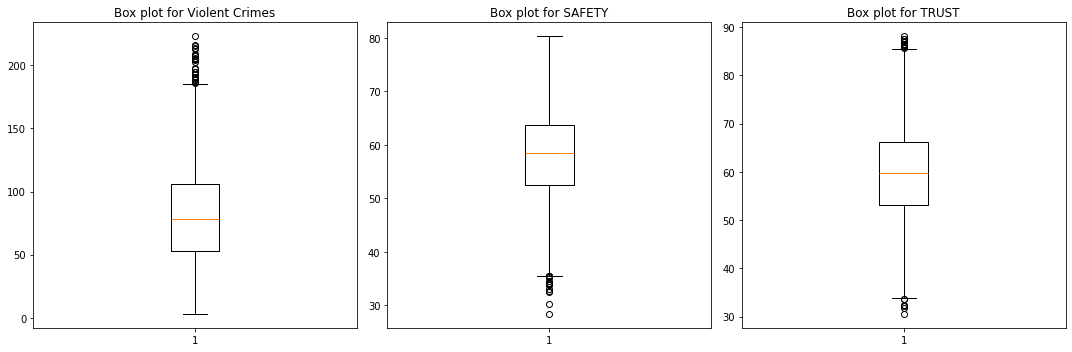

In [15]:

# Select only 'Violent Crimes', 'SAFETY', and 'TRUST' columns
df_selected = df_violent[['Violent Crimes', 'SAFETY', 'TRUST']]

# Create a figure for the box plots
plt.figure(figsize=(15, 5))  # Adjust the figure size as needed

# Create a box plot for each of the selected columns
for i, column in enumerate(df_selected.columns):
    plt.subplot(1, 3, i + 1)  
    plt.boxplot(df_selected[column].dropna())  
    plt.title(f'Box plot for {column}')

plt.tight_layout()
plt.show()


## Prepping for Machine Learing Model

In [16]:
# Converting the 'Month' column to datetime
df_violent['Month'] = pd.to_datetime(df_violent['Month'])

In [17]:
# Moved this to after train test split to avoid data leakage
'''# Selecting numerical columns for standardization
numerical_columns = df_violent.select_dtypes(include=['float64', 'int64']).columns
numerical_columns = numerical_columns.drop(['Sector', 'Violent Crimes'])

# Applying standardization
scaler = StandardScaler()
df_violent[numerical_columns] = scaler.fit_transform(df_violent[numerical_columns])

df_violent.head()
'''

"# Selecting numerical columns for standardization\nnumerical_columns = df_violent.select_dtypes(include=['float64', 'int64']).columns\nnumerical_columns = numerical_columns.drop(['Sector', 'Violent Crimes'])\n\n# Applying standardization\nscaler = StandardScaler()\ndf_violent[numerical_columns] = scaler.fit_transform(df_violent[numerical_columns])\n\ndf_violent.head()\n"

### Creating a new dataframe. Removing months and adding lag features for additional time-series analysis for a regression

In [18]:
#Dropping dates that don't have demographic specific Trust and Safety scores  

df_violent.set_index('Month', inplace=True)

# Filtering the data to include only dates from March 2018 onwards
df_violent_filtered = df_violent[df_violent.index >= '2018-03-01']

In [19]:
#Create lag features 

# List of columns to exclude. Static variables that do not have time component 
exclude_columns = ['Violent Crimes', 'Sector', 'Population Density (people/sqkm)', 'Units per Capita', 'Units per SqKm',
                  'PERCENT_OF_HOUSING_CROWDED', 'PERCENT_HOUSEHOLDS_BELOW_POVERTY',
                'PERCENT_AGED_16_UNEMPLOYED','PERCENT_AGED_25_WITHOUT_HIGH_SCHOOL_DIPLOMA',
                'PERCENT_AGED_UNDER_18_OR_OVER_64', 'PER_CAPITA_INCOME','HARDSHIP_INDEX', 'PERCENT_OF_HOUSING_CROWDED']  


# Creating 1-month lagged features for numerical columns 
numerical_columns = df_violent_filtered.select_dtypes(include=['float64', 'int64']).columns
numerical_columns = [col for col in numerical_columns if col not in exclude_columns]

# Creating separate dataframe from copy (to remove warning for using a slice of a copy)
df_violent_filtered_copy = df_violent_filtered.copy()

for column in numerical_columns:
    df_violent_filtered_copy[f'{column}_lag1'] = df_violent_filtered_copy[column].shift(1)

# Dropping the initial row with NaN values due to lagging
df_violent_filtered = df_violent_filtered_copy.dropna()

df_violent_filtered.head()

,Sector,Violent Crimes,SAFETY,S_EDUCATION_LOW,S_EDUCATION_MEDIUM,S_EDUCATION_HIGH,S_INCOME_LOW,S_INCOME_MEDIUM,S_INCOME_HIGH,TRUST,...,S_INCOME_LOW_lag1,S_INCOME_MEDIUM_lag1,S_INCOME_HIGH_lag1,TRUST_lag1,T_EDUCATION_LOW_lag1,T_EDUCATION_MEDIUM_lag1,T_EDUCATION_HIGH_lag1,T_INCOME_LOW_lag1,T_INCOME_MEDIUM_lag1,T_INCOME_HIGH_lag1
Month,,,,,,,,,,,,,,,,,,,,,
2018-04-01,110,64,71.22,67.28,73.23,73.46,61.29,78.17,71.59,68.27,...,65.28,78.70,73.23,70.81,59.96,71.98,73.84,56.56,74.95,76.14
2018-05-01,110,79,74.81,70.09,82.50,70.10,62.86,84.92,75.94,64.65,...,61.29,78.17,71.59,68.27,57.44,70.53,71.67,45.67,76.11,74.96
2018-06-01,110,67,74.93,72.19,79.07,72.50,67.54,77.34,78.84,65.90,...,62.86,84.92,75.94,64.65,56.17,67.42,67.53,50.58,71.86,67.03
2018-07-01,110,91,72.08,64.35,73.67,72.83,65.26,71.47,76.87,69.38,...,67.54,77.34,78.84,65.90,60.26,69.65,61.63,62.26,57.49,72.70
2018-08-01,110,96,73.39,67.94,72.96,78.46,66.18,70.29,76.69,72.86,...,65.26,71.47,76.87,69.38,70.21,70.63,66.61,69.72,61.60,76.27


In [20]:
df_violent_filtered.columns


Index(['Sector', 'Violent Crimes', 'SAFETY', 'S_EDUCATION_LOW',
       'S_EDUCATION_MEDIUM', 'S_EDUCATION_HIGH', 'S_INCOME_LOW',
       'S_INCOME_MEDIUM', 'S_INCOME_HIGH', 'TRUST', 'T_EDUCATION_LOW',
       'T_EDUCATION_MEDIUM', 'T_EDUCATION_HIGH', 'T_INCOME_LOW',
       'T_INCOME_MEDIUM', 'T_INCOME_HIGH', 'Population Density (people/sqkm)',
       'Units per SqKm', 'Units per Capita', 'PERCENT_OF_HOUSING_CROWDED',
       'PERCENT_HOUSEHOLDS_BELOW_POVERTY', 'PERCENT_AGED_16_UNEMPLOYED',
       'PERCENT_AGED_25_WITHOUT_HIGH_SCHOOL_DIPLOMA',
       'PERCENT_AGED_UNDER_18_OR_OVER_64', 'PER_CAPITA_INCOME',
       'HARDSHIP_INDEX', 'SAFETY_lag1', 'S_EDUCATION_LOW_lag1',
       'S_EDUCATION_MEDIUM_lag1', 'S_EDUCATION_HIGH_lag1', 'S_INCOME_LOW_lag1',
       'S_INCOME_MEDIUM_lag1', 'S_INCOME_HIGH_lag1', 'TRUST_lag1',
       'T_EDUCATION_LOW_lag1', 'T_EDUCATION_MEDIUM_lag1',
       'T_EDUCATION_HIGH_lag1', 'T_INCOME_LOW_lag1', 'T_INCOME_MEDIUM_lag1',
       'T_INCOME_HIGH_lag1'],
      dtype='o

### Creating training and testing data splits

##### Test to see if PCA improves scores

In [21]:
'''from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

X = df_violent_filtered.drop(['Violent Crimes', 'Sector'], axis=1)
y = df_violent_filtered['Violent Crimes']

# Assume X is your feature matrix and y is your target variable
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (recommended before PCA)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform PCA on the training set
pca = PCA(n_components=38)  # You can adjust the variance explained
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform the testing set using the PCA transformation learned from the training set
X_test_pca = pca.transform(X_test_scaled)

# Train your model using X_train_pca and y_train
# For example:
model = RandomForestRegressor()

model.fit(X_train_pca, y_train)

# Assume you have obtained predicted values from your model
# Predictions on the testing set
y_pred = model.predict(X_test_pca)

rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R-squared:", r2)

# Back-transform the PCA-transformed features to the original feature space
X_test_back_transformed = pca.inverse_transform(X_test_pca)

# If you had previously scaled your features, you need to inverse transform them
X_test_back_scaled = scaler.inverse_transform(X_test_back_transformed)

# Now, X_test_back_scaled contains the back-transformed features'''

'from sklearn.model_selection import train_test_split\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.decomposition import PCA\nimport numpy as np\n\nX = df_violent_filtered.drop([\'Violent Crimes\', \'Sector\'], axis=1)\ny = df_violent_filtered[\'Violent Crimes\']\n\n# Assume X is your feature matrix and y is your target variable\n# Split the data into training and testing sets\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n# Standardize the features (recommended before PCA)\nscaler = StandardScaler()\nX_train_scaled = scaler.fit_transform(X_train)\nX_test_scaled = scaler.transform(X_test)\n\n# Perform PCA on the training set\npca = PCA(n_components=38)  # You can adjust the variance explained\nX_train_pca = pca.fit_transform(X_train_scaled)\n\n# Transform the testing set using the PCA transformation learned from the training set\nX_test_pca = pca.transform(X_test_scaled)\n\n# Train your model using X_train_pca and y_train

##### Train Test Split

In [22]:
# Separating features and target variable
# Removed highly correlated variables (>0.85 correlation)

#Option 1:
X = df_violent_filtered.drop(['Violent Crimes', 'Sector','T_EDUCATION_MEDIUM','T_EDUCATION_MEDIUM_lag1','T_INCOME_MEDIUM','T_INCOME_MEDIUM_lag1',
                              'Units per SqKm','PERCENT_AGED_25_WITHOUT_HIGH_SCHOOL_DIPLOMA','S_EDUCATION_MEDIUM','S_EDUCATION_MEDIUM_lag1',
                              'T_EDUCATION_MEDIUM','T_EDUCATION_MEDIUM_lag1','HARDSHIP_INDEX'], axis=1)

#Option 2
#X = df_violent_filtered.drop(['Violent Crimes', 'Sector','SAFETY','TRUST','S_EDUCATION_MEDIUM_lag1','S_INCOME_LOW_lag1','TRUST_lag1'], axis=1)

y = df_violent_filtered['Violent Crimes']

# Splitting the dataset into training and testing sets 
split_idx = int(len(df_violent_filtered) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

In [23]:
#Scaling this way appears to achieve better scores --> ChatGPT explained that it's better to fit the scaler only on the training set. 
#Otherwise, you can end up with different scaling behaviors for training and test sets and there is a higher risk for data leakage.

scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
'''numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns

# Applying standardization
scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.fit_transform(X_test[numerical_columns])'''

"numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns\n\n# Applying standardization\nscaler = StandardScaler()\nX_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])\nX_test[numerical_columns] = scaler.fit_transform(X_test[numerical_columns])"

### Quick aside about feature selection consideration (ORIGINAL MODEL NOT UPDATED)

#### When using 'Sector' as a feature, the R2 values for random forest and gradient boosting are much higher, .77 for random forest. This makes sense because some areas are inevitably more associated with crime due to other variables not captured in the dataset like socioeconomic factors (poverty, education, etc.). Including sectors as a feature adds this potential component but not directly. Also has the issue of introducing potential bias so I'm not sure if including it is the best option. 

#### Scores with Sector included in features:
##### Random Forest': {'MAE': 12.564918918918918,'MSE': 265.5884502702703,'RMSE': 16.296884679909542,'R2': 0.7819728805980152},
#### Without: 
##### 'Random Forest': {'MAE': 22.904994594594598,'MSE': 815.274611027027,'RMSE': 28.553014044528243,'R2': 0.3307240025576754},

## Creating Regression Models

In [25]:
# Initializing the Linear Regression model
lr_model = LinearRegression()

# Training the model on the training set
lr_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = lr_model.predict(X_test)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Displaying the evaluation metrics
mae, mse, rmse, r2


(20.86885559209719, 710.3187329196159, 26.65180543452199, 0.416884480337406)

### Looking at other models

In [26]:
#Iterating through dictionary of different models, creating a model from data splits, and generating scores for each

# Initializing the models
rf_model = RandomForestRegressor()
gb_model = GradientBoostingRegressor()
svr_model = SVR()
ridge_model = Ridge()
lasso_model = Lasso()
elastic_net_model = ElasticNet()

# Dictionary to store models and their predictions
models = {
    "Random Forest": rf_model,
    "Gradient Boosting": gb_model,
    "Support Vector Regression": svr_model,
    "Ridge Regression": ridge_model,
    "Lasso Regression": lasso_model,
    "Elastic Net": elastic_net_model
}

# Dictionary to store evaluation metrics
model_metrics = {}

# Training each model and evaluating
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    model_metrics[model_name] = {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2": r2
    }

# Displaying the evaluation metrics for each model
model_metrics

{'Random Forest': {'MAE': 12.077610810810812,
  'MSE': 248.4686496216216,
  'RMSE': 15.762888365449449,
  'R2': 0.7960268833845171},
 'Gradient Boosting': {'MAE': 12.8627761013065,
  'MSE': 270.24143106291774,
  'RMSE': 16.439021596887017,
  'R2': 0.7781531512467526},
 'Support Vector Regression': {'MAE': 19.196726607864285,
  'MSE': 614.3966079812309,
  'RMSE': 24.78702499254864,
  'R2': 0.4956289610027025},
 'Ridge Regression': {'MAE': 20.869097672097347,
  'MSE': 710.2867041076909,
  'RMSE': 26.651204552659358,
  'R2': 0.4169107734596964},
 'Lasso Regression': {'MAE': 21.38794492484316,
  'MSE': 721.7361570067674,
  'RMSE': 26.865147626744346,
  'R2': 0.407511677859816},
 'Elastic Net': {'MAE': 21.68183213130742,
  'MSE': 731.8376729968355,
  'RMSE': 27.05249846126667,
  'R2': 0.39921913189004055}}

### Random Forest the best performing model. Let's proceed with this model

In [27]:
# Initializing the Random Forest regressor
rf_model = RandomForestRegressor()

# Experiment with random_states
#rf_model = RandomForestRegressor(random_state=42)

# Training the model on the training set
rf_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Displaying the evaluation metrics
mae, mse, rmse, r2


(11.861372972972973,
 240.14569005405406,
 15.496634797724765,
 0.8028593751497626)

In [28]:
# Initializing the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor()

# Experiment with random_states
#rf_model = RandomForestRegressor(random_state=42)

# Training the model on the training set
gb_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = gb_model.predict(X_test)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Displaying the evaluation metrics
mae, mse, rmse, r2


(12.873028807722037, 270.0162245948212, 16.432170416436815, 0.7783380279515183)

## Feature Analysis, Hyperparameter Tuning, etc. :


### Feature Analysis/Importance

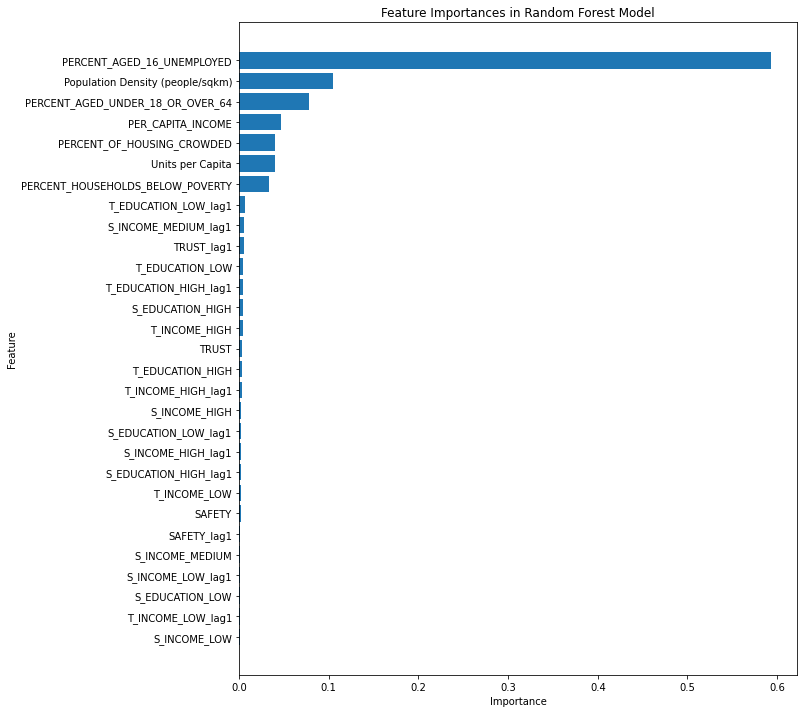

In [29]:
#Analyzing most important features that the model is using for prediction 

# Extract feature importances
importances = gb_model.feature_importances_

# Convert the importances into a DataFrame
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 12))
plt.barh(feature_importances['feature'], feature_importances['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Random Forest Model')
plt.gca().invert_yaxis() 
plt.show()


In [30]:
"""rom sklearn.feature_selection import RFECV

# Create a RandomForestRegressor as the base model
model = RandomForestRegressor(max_depth=20, 
                                      min_samples_split=2, 
                                      n_estimators=300,
                                      random_state=42)

# Initialize RFECV
rfecv = RFECV(estimator=model, step=1, cv=5)  # You can adjust the number of cross-validation folds (cv) and step size as needed

# Fit RFECV on training data
rfecv.fit(X_train, y_train)

# Visualize the feature ranking
print("Optimal number of features: {}".format(rfecv.n_features_))

'''
# Plot number of features vs. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (R^2)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()'''

# Get the selected features
selected_features = X_train.columns[rfecv.support_]

# Use the selected features for modeling
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Train your model on the selected features
model.fit(X_train_selected, y_train)

# Evaluate the model on the test set
y_pred = model.predict(X_test_selected)

# Calculate evaluation metrics (e.g., Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R-squared:", r2)

print(f'Mean Squared Error on Test Set: {mse}')
"""

'rom sklearn.feature_selection import RFECV\n\n# Create a RandomForestRegressor as the base model\nmodel = RandomForestRegressor(max_depth=20, \n                                      min_samples_split=2, \n                                      n_estimators=300,\n                                      random_state=42)\n\n# Initialize RFECV\nrfecv = RFECV(estimator=model, step=1, cv=5)  # You can adjust the number of cross-validation folds (cv) and step size as needed\n\n# Fit RFECV on training data\nrfecv.fit(X_train, y_train)\n\n# Visualize the feature ranking\nprint("Optimal number of features: {}".format(rfecv.n_features_))\n\n\'\'\'\n# Plot number of features vs. cross-validation scores\nplt.figure()\nplt.xlabel("Number of features selected")\nplt.ylabel("Cross-validation score (R^2)")\nplt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)\nplt.show()\'\'\'\n\n# Get the selected features\nselected_features = X_train.columns[rfecv.support_]\n\n# Use the selected features

Result: Optimal number of features: 33 Mean Squared Error on Test Set: 245.23543025534374
will send photo of visual produced (also in Regression_Visuals.ipynb)

### Hyperparemeter Tuning

In [31]:
#Takes awhile to run. Add and remove docstrings as needed. Run when using new model
"""
# Define the model
rf = RandomForestRegressor(random_state=42)

# Define the parameters grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [10, 20, 30],        # Maximum depth of the tree
    'min_samples_split': [2, 5, 10]   # Minimum number of samples required to split an internal node
}

# Initialize Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)
"""



'\n# Define the model\nrf = RandomForestRegressor(random_state=42)\n\n# Define the parameters grid\nparam_grid = {\n    \'n_estimators\': [100, 200, 300],  # Number of trees in the forest\n    \'max_depth\': [10, 20, 30],        # Maximum depth of the tree\n    \'min_samples_split\': [2, 5, 10]   # Minimum number of samples required to split an internal node\n}\n\n# Initialize Grid Search\ngrid_search = GridSearchCV(estimator=rf, param_grid=param_grid, \n                           cv=3, n_jobs=-1, verbose=2, scoring=\'neg_mean_squared_error\')\n\n# Fit the grid search to the data\ngrid_search.fit(X_train, y_train)\n\n# Print the best parameters\nprint("Best parameters found: ", grid_search.best_params_)\n'

### Results of above (save time having to re-run when running all cells):
##### Fitting 3 folds for each of 27 candidates, totalling 81 fits
##### Best parameters found:  {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 300}

### Creating model with parameters above

In [32]:

# Initialize the Random Forest regressor with the best parameters
rf_model_best = RandomForestRegressor(max_depth=20, 
                                      min_samples_split=2, 
                                      n_estimators=300,
                                      random_state=42)

# Train the model on the training set
rf_model_best.fit(X_train, y_train)

# Making predictions on the test set
y_pred_best = rf_model_best.predict(X_test)

# Evaluating the model with the best parameters
mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
r2_best = r2_score(y_test, y_pred_best)

# Displaying the evaluation metrics with the best parameters
print('MAE:', mae_best)
print('MSE:', mse_best)
print('RMSE:', rmse_best)
print('R2:', r2_best)


MAE: 11.909077858855074
MSE: 239.83184649915185
RMSE: 15.486505302977552
R2: 0.803117015894865


## Inspecting other DataSets we can consider
### CREATING DATAFRAME FOR OUR MAIN DATASET FOR INSPECTION

In [33]:
#Will take awhile to run. Add and remove docstrings as needed 

"""
import pandas as pd
from sqlalchemy import create_engine

# Database credentials
username = 'crimeadmin'
password = '4DAnuuSBWVQ92w!F'
host = 'crimedbmysql.cspoouh9lugd.us-east-2.rds.amazonaws.com'
database = 'crimedb_mysql'
port = '3306'  # default MySQL port

# Create the database engine
engine = create_engine(f'mysql+mysqlconnector://{username}:{password}@{host}:{port}/{database}')

# SQL query or table name
query = "SELECT * FROM Chicago_Crime_Main"  #Name of table 

# Create a DataFrame from the SQL query
df_crime_main = pd.read_sql(query, engine)

df_crime_main.head(10)
"""

'\nimport pandas as pd\nfrom sqlalchemy import create_engine\n\n# Database credentials\nusername = \'crimeadmin\'\npassword = \'4DAnuuSBWVQ92w!F\'\nhost = \'crimedbmysql.cspoouh9lugd.us-east-2.rds.amazonaws.com\'\ndatabase = \'crimedb_mysql\'\nport = \'3306\'  # default MySQL port\n\n# Create the database engine\nengine = create_engine(f\'mysql+mysqlconnector://{username}:{password}@{host}:{port}/{database}\')\n\n# SQL query or table name\nquery = "SELECT * FROM Chicago_Crime_Main"  #Name of table \n\n# Create a DataFrame from the SQL query\ndf_crime_main = pd.read_sql(query, engine)\n\ndf_crime_main.head(10)\n'

### Inspecting other data sets we have

In [34]:
#INFO ON DATASET:
#Published in 2014 using data from 2008-2012. Data is by community area which is a different granularity to our current data which is by police
#sector and doesn't have specific location coordinates to easily convert 

import pandas as pd
from sqlalchemy import create_engine

# Database credentials
username = 'crimeadmin'
password = '4DAnuuSBWVQ92w!F'
host = 'crimedbmysql.cspoouh9lugd.us-east-2.rds.amazonaws.com'
database = 'crimedb_mysql'
port = '3306'  # default MySQL port

# Create the database engine
engine = create_engine(f'mysql+mysqlconnector://{username}:{password}@{host}:{port}/{database}')

# SQL query or table name
query = "SELECT * FROM Cleaned_Census_Data"  #Name of table 

# Create a DataFrame from the SQL query
df_census = pd.read_sql(query, engine)

In [35]:
df_census.head(5)

,id,Community_Area_Number,COMMUNITY_AREA_NAME,PERCENT_OF_HOUSING_CROWDED,PERCENT_HOUSEHOLDS_BELOW_POVERTY,PERCENT_AGED_16_UNEMPLOYED,PERCENT_AGED_25_WITHOUT_HIGH_SCHOOL_DIPLOMA,PERCENT_AGED_UNDER_18_OR_OVER_64,PER_CAPITA_INCOME,HARDSHIP_INDEX
0,1,1,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39
1,2,2,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46
2,3,3,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20
3,4,4,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17
4,5,5,North Center,0.3,7.5,5.2,4.5,26.2,57123,6


### Other datasets available:

#### Data on bus and train ridership numbers by month. Fits into our monthly time frames. Would have to be adjusted per capita of population probably. Have census population data updated in 2019 for each census block/tract. Would have to convert locations

#### Data from 2020 on open and closed grocery stores. Could be used to assess food deserts

## Visuals

### Feature Correlation

In [36]:
correlation_matrix = df_violent_filtered.corr()
correlation_matrix.style.background_gradient(cmap='coolwarm')

,Sector,Violent Crimes,SAFETY,S_EDUCATION_LOW,S_EDUCATION_MEDIUM,S_EDUCATION_HIGH,S_INCOME_LOW,S_INCOME_MEDIUM,S_INCOME_HIGH,TRUST,T_EDUCATION_LOW,T_EDUCATION_MEDIUM,T_EDUCATION_HIGH,T_INCOME_LOW,T_INCOME_MEDIUM,T_INCOME_HIGH,Population Density (people/sqkm),Units per SqKm,Units per Capita,PERCENT_OF_HOUSING_CROWDED,PERCENT_HOUSEHOLDS_BELOW_POVERTY,PERCENT_AGED_16_UNEMPLOYED,PERCENT_AGED_25_WITHOUT_HIGH_SCHOOL_DIPLOMA,PERCENT_AGED_UNDER_18_OR_OVER_64,PER_CAPITA_INCOME,HARDSHIP_INDEX,SAFETY_lag1,S_EDUCATION_LOW_lag1,S_EDUCATION_MEDIUM_lag1,S_EDUCATION_HIGH_lag1,S_INCOME_LOW_lag1,S_INCOME_MEDIUM_lag1,S_INCOME_HIGH_lag1,TRUST_lag1,T_EDUCATION_LOW_lag1,T_EDUCATION_MEDIUM_lag1,T_EDUCATION_HIGH_lag1,T_INCOME_LOW_lag1,T_INCOME_MEDIUM_lag1,T_INCOME_HIGH_lag1
Sector,1.000000,-0.469305,0.396207,0.334261,0.331924,0.218038,0.353524,0.323908,0.204579,0.401085,0.354134,0.354828,0.269556,0.382266,0.343889,0.184336,0.467497,-0.080139,-0.293347,0.135191,-0.401849,-0.407966,-0.045462,-0.189730,0.179401,-0.251583,0.393954,0.332389,0.330299,0.217035,0.350652,0.322457,0.204731,0.399502,0.352850,0.353357,0.270687,0.379947,0.343215,0.184491
Violent Crimes,-0.469305,1.000000,-0.488449,-0.321105,-0.419977,-0.273640,-0.411597,-0.395418,-0.237036,-0.541114,-0.448343,-0.477525,-0.352871,-0.440543,-0.459918,-0.275580,-0.268398,-0.009648,0.131889,0.222477,0.555803,0.603922,0.331668,0.477635,-0.402499,0.575872,-0.479089,-0.311457,-0.407446,-0.287196,-0.402514,-0.379621,-0.232064,-0.545627,-0.452586,-0.480586,-0.356371,-0.440567,-0.458709,-0.287427
SAFETY,0.396207,-0.488449,1.000000,0.731120,0.876244,0.567421,0.761002,0.833113,0.592314,0.643266,0.495070,0.573894,0.394848,0.545123,0.542071,0.322408,0.219199,-0.024617,-0.127095,-0.261721,-0.564783,-0.580260,-0.372146,-0.429686,0.421071,-0.564824,0.731535,0.510245,0.639592,0.428798,0.544563,0.611776,0.429241,0.557195,0.387274,0.517448,0.347782,0.460137,0.474830,0.271540
S_EDUCATION_LOW,0.334261,-0.321105,0.731120,1.000000,0.454821,0.329341,0.652260,0.539754,0.361932,0.482067,0.514734,0.370697,0.269754,0.456659,0.376206,0.227407,0.116376,-0.028496,-0.095617,-0.149198,-0.392529,-0.374664,-0.216152,-0.234231,0.259670,-0.349026,0.502907,0.480952,0.396833,0.276559,0.393540,0.407995,0.281199,0.391601,0.298586,0.358640,0.244512,0.340915,0.324706,0.193628
S_EDUCATION_MEDIUM,0.331924,-0.419977,0.876244,0.454821,1.000000,0.387674,0.639792,0.794233,0.517026,0.542895,0.351274,0.550746,0.307629,0.442957,0.485453,0.261978,0.180551,-0.031657,-0.120817,-0.219336,-0.479627,-0.493746,-0.311146,-0.356838,0.350244,-0.478324,0.636061,0.400770,0.608808,0.342528,0.469523,0.547641,0.369886,0.470779,0.314419,0.448081,0.283216,0.382684,0.413545,0.222346
S_EDUCATION_HIGH,0.218038,-0.273640,0.567421,0.329341,0.387674,1.000000,0.345098,0.466982,0.613842,0.348006,0.226196,0.291092,0.450158,0.267290,0.296804,0.302217,0.091541,-0.029650,-0.078561,-0.124750,-0.296278,-0.285723,-0.165880,-0.200914,0.183105,-0.274828,0.436942,0.276237,0.361619,0.476486,0.281498,0.364389,0.386176,0.297575,0.177938,0.275977,0.270348,0.229697,0.264664,0.182992
S_INCOME_LOW,0.353524,-0.411597,0.761002,0.652260,0.639792,0.345098,1.000000,0.437397,0.303254,0.542017,0.500244,0.461575,0.301829,0.596134,0.396050,0.230953,0.209161,0.007662,-0.089106,-0.178885,-0.432007,-0.453972,-0.273366,-0.331827,0.342301,-0.432110,0.547717,0.405598,0.476832,0.279457,0.538884,0.397311,0.279474,0.469724,0.375195,0.428641,0.284257,0.428613,0.387019,0.226905
S_INCOME_MEDIUM,0.323908,-0.395418,0.833113,0.539754,0.794233,0.466982,0.437397,1.000000,0.391430,0.525628,0.360427,0.495300,0.322295,0.365014,0.530545,0.237908,0.183496,-0.049649,-0.136579,-0.242757,-0.476146,-0.485014,-0.327164,-0.369440,0.369195,-0.480107,0.604905,0.407387,0.539771,0.357182,0.403611,0.584751,0.325789,0.458064,0.301323,0.432377,0.282536,0.356450,0.415944,0.215599
S_INCOME_HIGH,0.204579,-0.237036,0.592314,0.361932,0.517026,0.613842,0.303254,0.391430,1.000000,0.283967,0.170753,0.254171,0.292769,0.220178,0.219043,0.3544

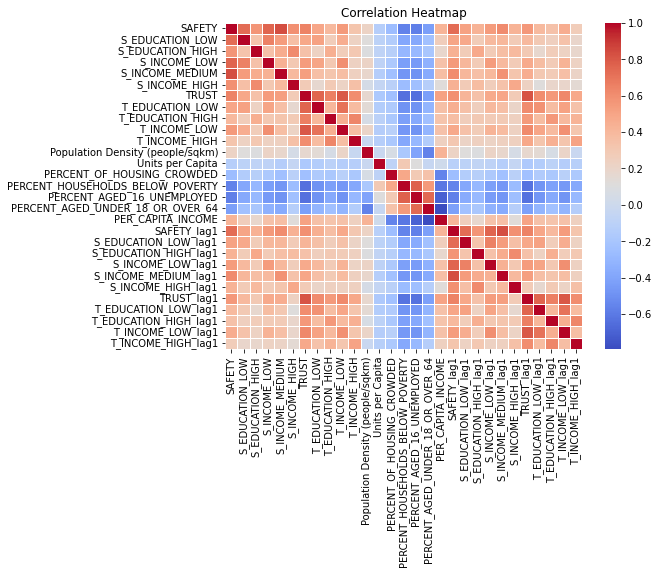

In [37]:
import seaborn as sns
correlation_matrix = X.corr()

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, cmap="coolwarm", fmt=".2f", linewidths=.8)

# Show the plot
plt.title("Correlation Heatmap")
plt.show()

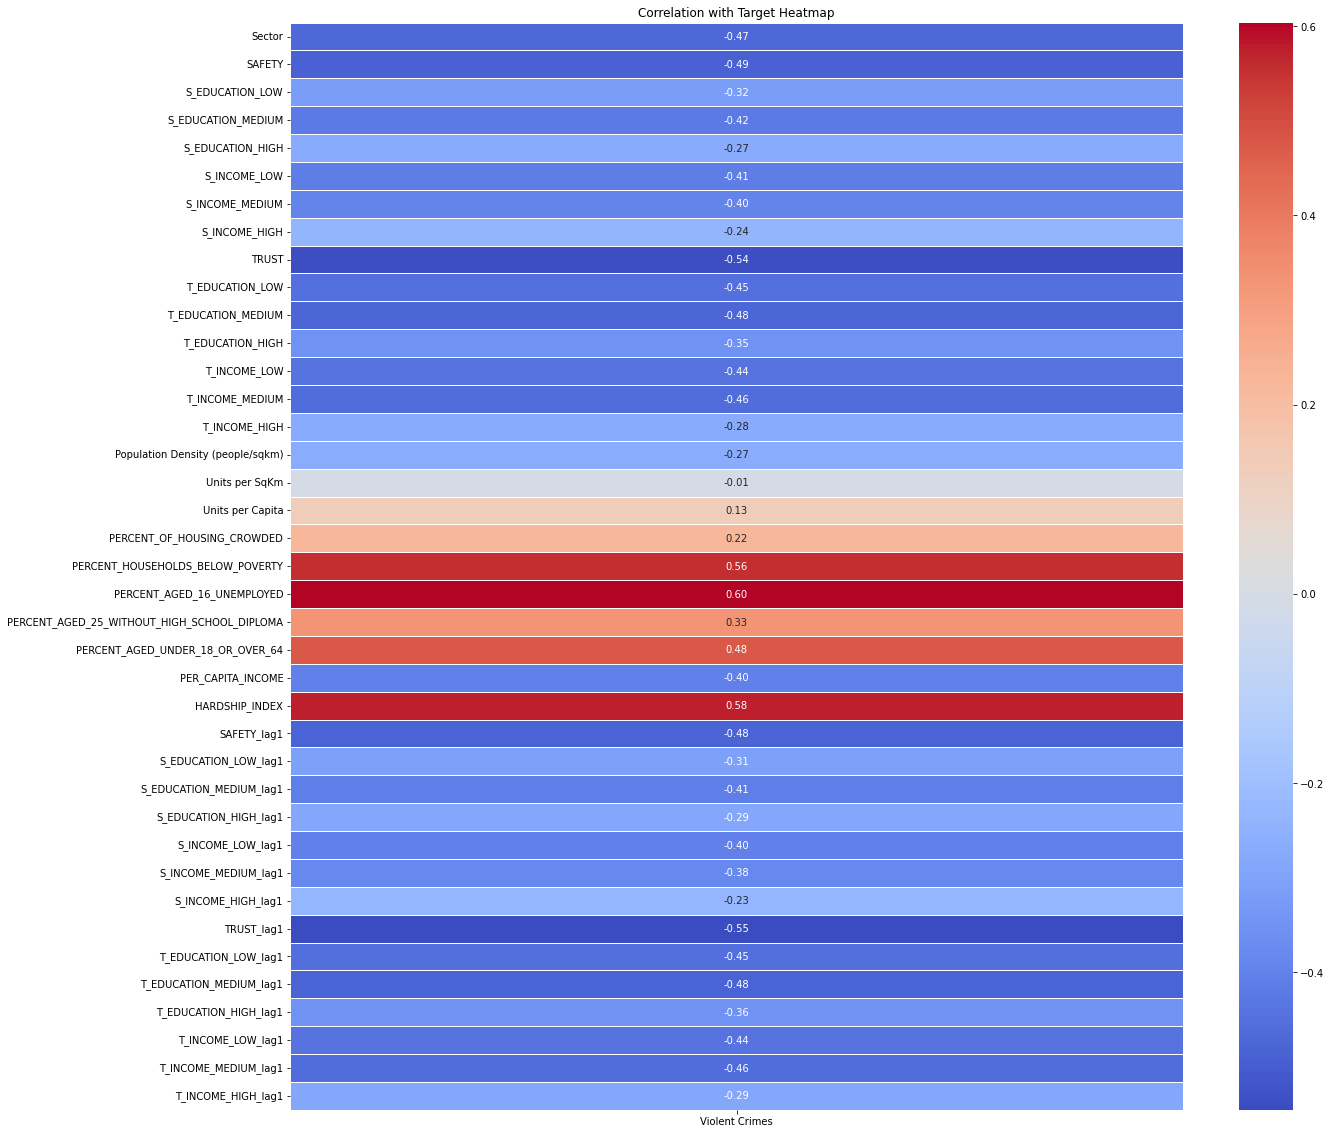

In [38]:
# Calculate correlation between features and target variable
correlation_with_target = df_violent_filtered.corr()['Violent Crimes'].drop('Violent Crimes')

# Create a heatmap for correlation with the target variable
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_with_target.to_frame(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation with Target Heatmap')
plt.show()

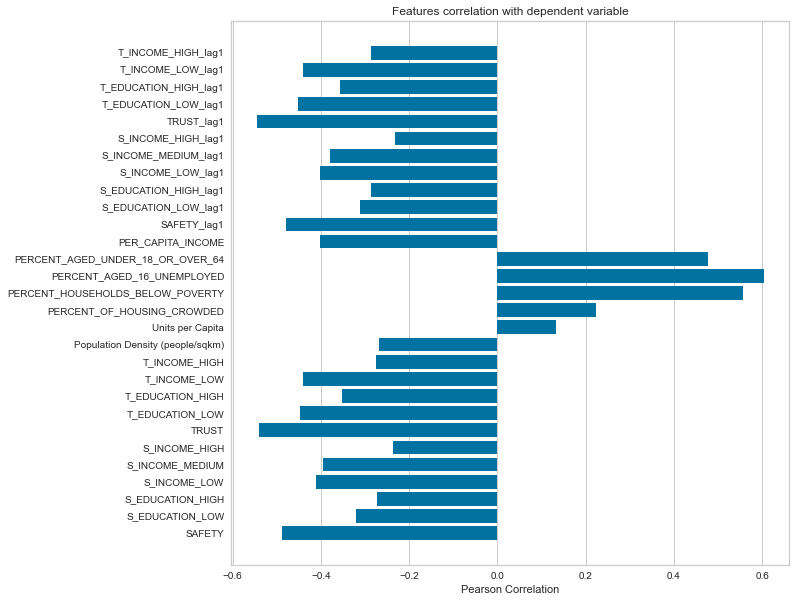

<Axes: title={'center': 'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [46]:
from sklearn import datasets
from yellowbrick.target import FeatureCorrelation

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=X.columns, size=(720,720))

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()         

### Model Evaluation Visuals

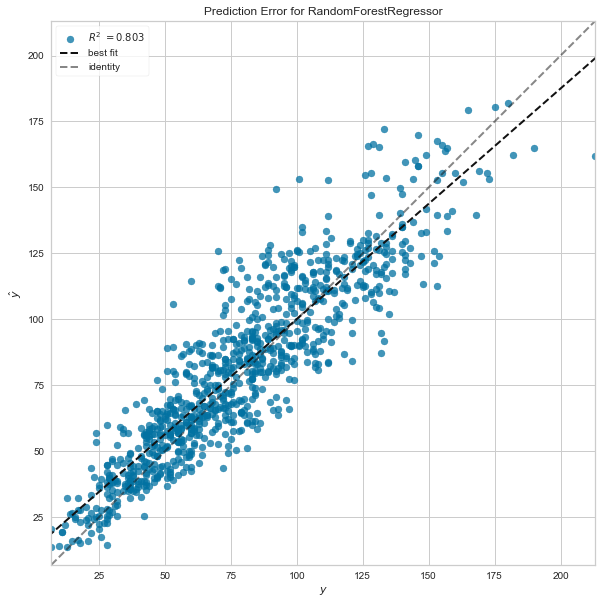

<Axes: title={'center': 'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [40]:
from yellowbrick.regressor import PredictionError

# Instantiate the linear model and visualizer
model = RandomForestRegressor(max_depth=20, 
                                      min_samples_split=2, 
                                      n_estimators=300,
                                      random_state=42)

visualizer = PredictionError(model, size=(1080, 720))

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Draw the data

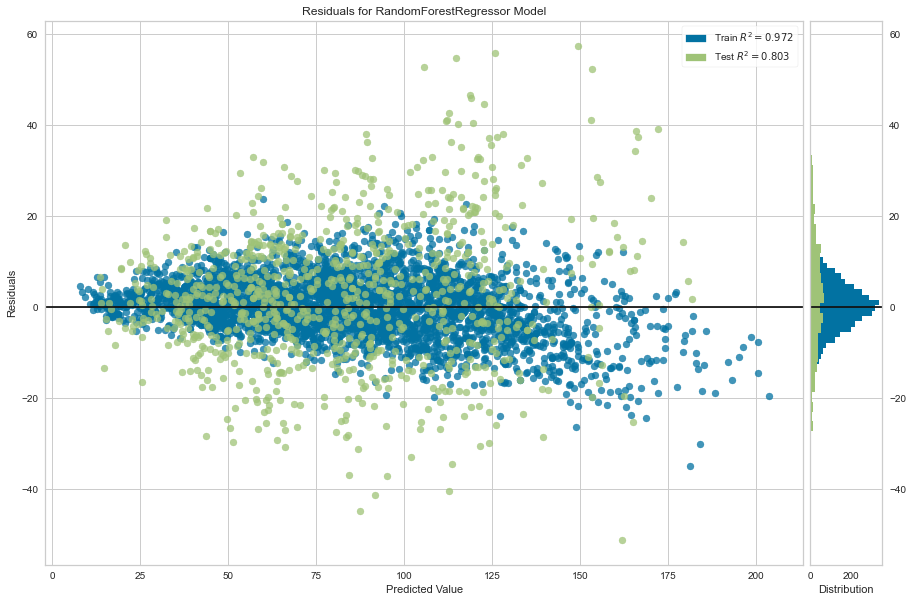

<Axes: title={'center': 'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [41]:
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(model, size=(1080, 720))

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Draw the data

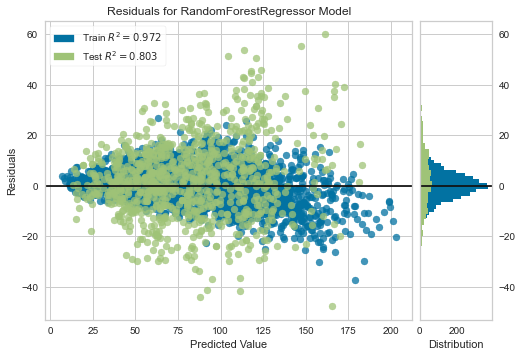

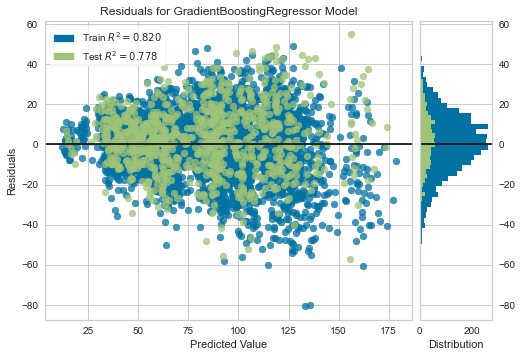

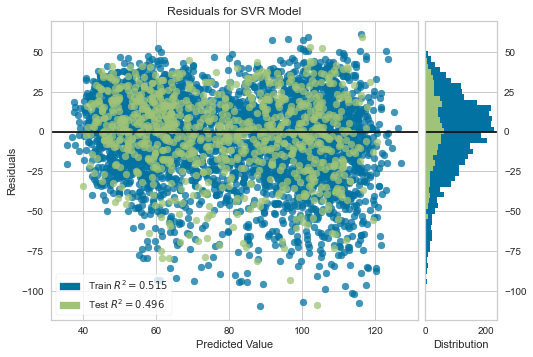

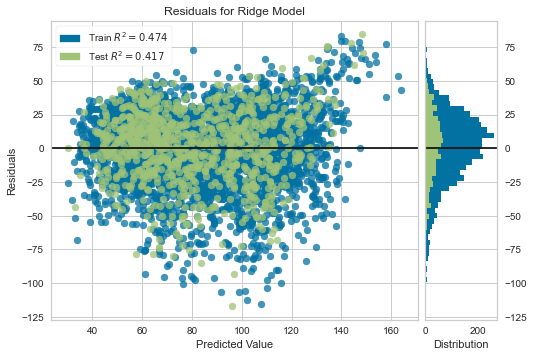

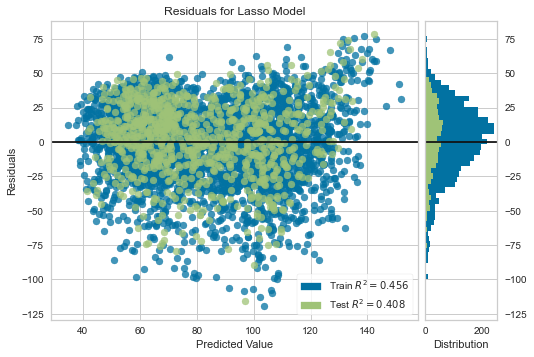

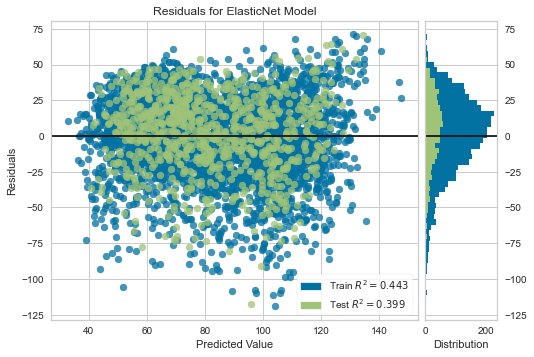

In [42]:
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import BayesianRidge, LinearRegression

regressors = {
    "Random Forest": rf_model,
    "Gradient Boosting": gb_model,
    "Support Vector Regression": svr_model,
    "Ridge Regression": ridge_model,
    "Lasso Regression": lasso_model,
    "Elastic Net": elastic_net_model
}

for _, regressor in regressors.items():
    visualizer = ResidualsPlot(regressor)
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show()

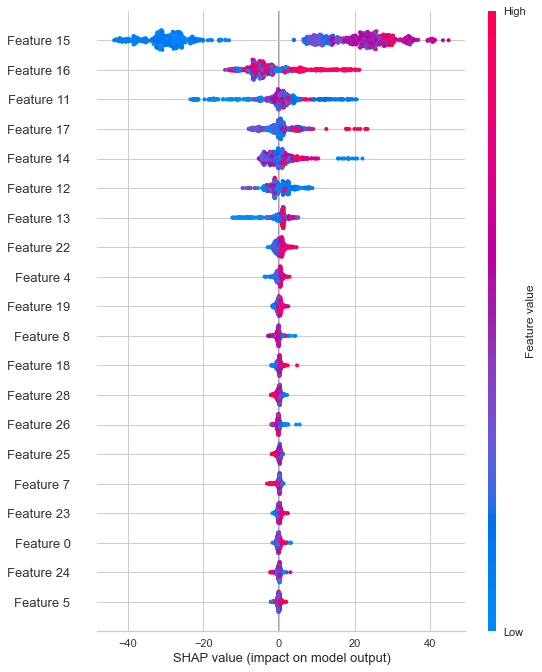

In [43]:
import shap

model.fit(X_train, y_train)

# Make prediction on the testing data
y_pred = model.predict(X_test)

explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)

Mean Squared Error: 239.83184649915185


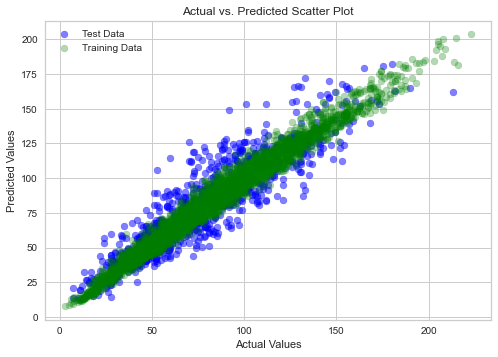

In [44]:
from sklearn.metrics import mean_squared_error

# Train the model
model = RandomForestRegressor(max_depth=20, 
                                      min_samples_split=2, 
                                      n_estimators=300,
                                      random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE) for evaluation
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Create Actual vs. Predicted Scatter Plot
plt.scatter(y_test, y_pred, alpha=0.5, label='Test Data', color='blue')
plt.scatter(y_train, model.predict(X_train), alpha=0.3, label='Training Data', color='green')
plt.title('Actual vs. Predicted Scatter Plot')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()